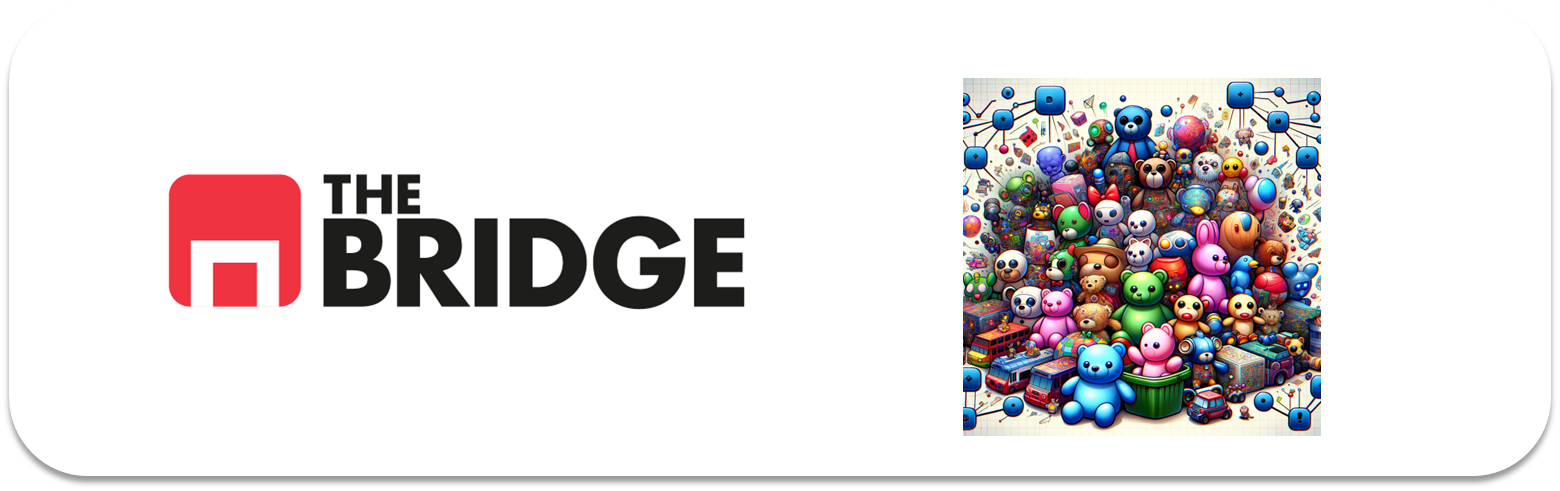

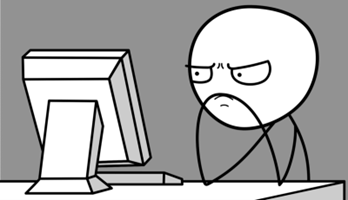

Para ejercitarte y afianzar lo aprendido sobre **K-Means**, completa los siguientes ejercicios. Recuerda que necesitarás datos que están en el directorio data que acompaña al notebook (búscalo en el repositorio de ejercicios)
  
La solución a los mismos las tienes ya, intenta no mirarlos de primeras pero no dejes de hacerlo cuando hayas terminado por si te pudieran aportar.

### Ejercicio 0

Importa los paquetes y módulos que necesites a lo largo del notebook

In [8]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import chi2_contingency
from sklearn.cluster import KMeans
import funciones_ML as bt
from sklearn.model_selection import train_test_split
import ptitprince as pt


### Entendiendo el problema de negocio

En este notebook vamos a hacer un análisis de datos tirando de clusterizaciones para evaluar si existen grupos en nuestros productos, en este caso medicamentos, y posteriormente poder etiquetarlos. Poseemos información como rating, efectividad, efectos secundarios, entre otros.

### Ejercicio 1

Importa los datos, "./data/drugLibTrain_raw.tsv", que contiene un dataset con diferentes fármacos, sus efectos y ratings de los clientes de dichos fármacos. Realiza una inspección preliminar y quita las columnas que consideres innecesarias.

In [10]:

df_med=pd.read_csv(r"/home/vicevil/Documentos/ONLINE_DS_THEBRIDGE_V/SPRINT_15_NO_SUPERVISADOS_CLUSTERING/UNIT_1/EJERCICIOS/data/drugLibTrain_raw.tsv", sep="\t")

In [11]:
df_med

,Unnamed: 0,urlDrugName,rating,effectiveness,sideEffects,condition,benefitsReview,sideEffectsReview,commentsReview
0,2202,enalapril,4,Highly Effective,Mild Side Effects,management of congestive heart failure,slowed the progression of left ventricular dys...,"cough, hypotension , proteinuria, impotence , ...","monitor blood pressure , weight and asses for ..."
1,3117,ortho-tri-cyclen,1,Highly Effective,Severe Side Effects,birth prevention,Although this type of birth control has more c...,"Heavy Cycle, Cramps, Hot Flashes, Fatigue, Lon...","I Hate This Birth Control, I Would Not Suggest..."
2,1146,ponstel,10,Highly Effective,No Side Effects,menstrual cramps,I was used to having cramps so badly that they...,Heavier bleeding and clotting than normal.,I took 2 pills at the onset of my menstrual cr...
3,3947,prilosec,3,Marginally Effective,Mild Side Effects,acid reflux,The acid reflux went away for a few months aft...,"Constipation, dry mouth and some mild dizzines...",I was given Prilosec prescription at a dose of...
4,1951,lyrica,2,Marginally Effective,Severe Side Effects,fibromyalgia,I think that the Lyrica was starting to help w...,I felt extremely drugged and dopey. Could not...,See above
...,...,...,...,...,...,...,...,...,...
3102,1039,vyvanse,10,Highly Effective,Mild Side Effects,adhd,"Increased focus, attention, productivity. Bett...","Restless legs at night, insomnia, headache (so...","I took adderall once as a child, and it made m..."
3103,3281,zoloft,1,Ineffective,Extremely Severe Side Effects,depression,Emotions were somewhat blunted. Less moodiness.,"Weight gain, extreme tiredness during the day,...",I was on Zoloft for about 2 years total. I am ...
3104,1664,climara,2,Marginally Effective,Moderate Side Effects,total hysterctomy,---,Constant issues with the patch not staying on....,---
3105,2621,trileptal,8,Considerably Effective,Mild Side Effects,epilepsy,Controlled complex partial seizures.,"Dizziness, fatigue, nausea",Started at 2 doses of 300 mg a day and worked ...


### Ejercicio 2: MiniEDA

Como es un problema no supervisado (vamos a intentar agrupar los medicamentos sin tener una referencia o target inicial), no hay split, vamos directos al miniEDA. Analiza qué variables son descartables en función de su porcentaje de cardinalidad. Es decir obten la cardinalidad y su porcentaje para cada posible feature y crea un dataset nuevo descartando las features que creas conveniente. NOTA: Como simplificación, descarta la columna con url.

In [12]:
bt.obtener_estadisticas(df_med)

,porcentaje_cardinalidad,Tipo,media,moda,std,var,Q1,mediana,Q3,Categoria,porcentaje_NaN
Unnamed: 0,100.0,int64,2080.61,No,1188.0,1411341.21,1062.5,2092.0,3092.5,numerica continua,0.0
urlDrugName,16.16,object,No,lexapro,No,No,No,No,No,categorica ordinal,0.0
rating,0.32,int64,7.01,No,2.94,8.63,5.0,8.0,9.0,numerica discreta,0.0
effectiveness,0.16,object,No,Highly Effective,No,No,No,No,No,categorica ordinal,0.0
sideEffects,0.16,object,No,Mild Side Effects,No,No,No,No,No,categorica ordinal,0.0
condition,45.9,object,No,depression,No,No,No,No,No,categorica ordinal,0.03
benefitsReview,97.55,object,No,none,No,No,No,No,No,categorica ordinal,0.58
sideEffectsReview,90.54,object,No,none,No,No,No,No,No,categorica ordinal,2.41
commentsReview,98.04,object,No,none,No,No,No,No,No,categorica ordinal,0.39


Las que tienen una cardinalidad muy alta, son: 'benefitsReview', 'sideEffectsReview', 'commentsReview', ademas de ser las que mayor numero de NaNs tienen, por lo qque las eliminamos, junto con 'Unnamed: 0'

In [13]:
df_med.drop(columns={"Unnamed: 0",'benefitsReview', 'sideEffectsReview', 'commentsReview'}, inplace=True)

In [14]:
bt.obtener_estadisticas(df_med)

,porcentaje_cardinalidad,Tipo,media,moda,std,var,Q1,mediana,Q3,Categoria,porcentaje_NaN
urlDrugName,16.16,object,No,lexapro,No,No,No,No,No,categorica ordinal,0.0
rating,0.32,int64,7.01,No,2.94,8.63,5.0,8.0,9.0,numerica discreta,0.0
effectiveness,0.16,object,No,Highly Effective,No,No,No,No,No,categorica ordinal,0.0
sideEffects,0.16,object,No,Mild Side Effects,No,No,No,No,No,categorica ordinal,0.0
condition,45.9,object,No,depression,No,No,No,No,No,categorica ordinal,0.03


debido a que representa un minima proporcion 0.03% de los datos, le imputo la moda


In [7]:
df_med.columns

Index(['urlDrugName', 'rating', 'effectiveness', 'sideEffects', 'condition'], dtype='object')

In [15]:
df_med["condition"].fillna("depression", inplace=True)

/tmp/ipykernel_7443/3248030877.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_med["condition"].fillna("depression", inplace=True)


In [16]:
bt.obtener_estadisticas(df_med)

,porcentaje_cardinalidad,Tipo,media,moda,std,var,Q1,mediana,Q3,Categoria,porcentaje_NaN
urlDrugName,16.16,object,No,lexapro,No,No,No,No,No,categorica ordinal,0.0
rating,0.32,int64,7.01,No,2.94,8.63,5.0,8.0,9.0,numerica discreta,0.0
effectiveness,0.16,object,No,Highly Effective,No,No,No,No,No,categorica ordinal,0.0
sideEffects,0.16,object,No,Mild Side Effects,No,No,No,No,No,categorica ordinal,0.0
condition,45.9,object,No,depression,No,No,No,No,No,categorica ordinal,0.0


In [17]:
#las convierto a todas en categorigas
def trans_numerica(numero):
    if numero == 1:
        return "uno"
    elif numero == 2:
        return "dos"
    elif numero == 3:
        return "tres"
    elif numero == 4:
        return "cuatro"
    elif numero == 5:
        return "cinco"
    elif numero == 6:
        return "seis"
    elif numero == 7:
        return "siete"
    elif numero == 8:
        return "ocho"
    elif numero == 9:
        return "nueve"
    elif numero == 10:
        return "diez"
    else:
        return "no es un numero"
    
df_med["rating"]= df_med.rating.apply(trans_numerica)

In [19]:
bt.obtener_estadisticas(df_med)

,porcentaje_cardinalidad,Tipo,media,moda,std,var,Q1,mediana,Q3,Categoria,porcentaje_NaN
urlDrugName,16.16,object,No,lexapro,No,No,No,No,No,categorica ordinal,0.0
rating,0.32,object,No,diez,No,No,No,No,No,categorica ordinal,0.0
effectiveness,0.16,object,No,Highly Effective,No,No,No,No,No,categorica ordinal,0.0
sideEffects,0.16,object,No,Mild Side Effects,No,No,No,No,No,categorica ordinal,0.0
condition,45.9,object,No,depression,No,No,No,No,No,categorica ordinal,0.0


In [22]:
col_cat=['urlDrugName', 'rating', 'effectiveness', 'sideEffects', 'condition']

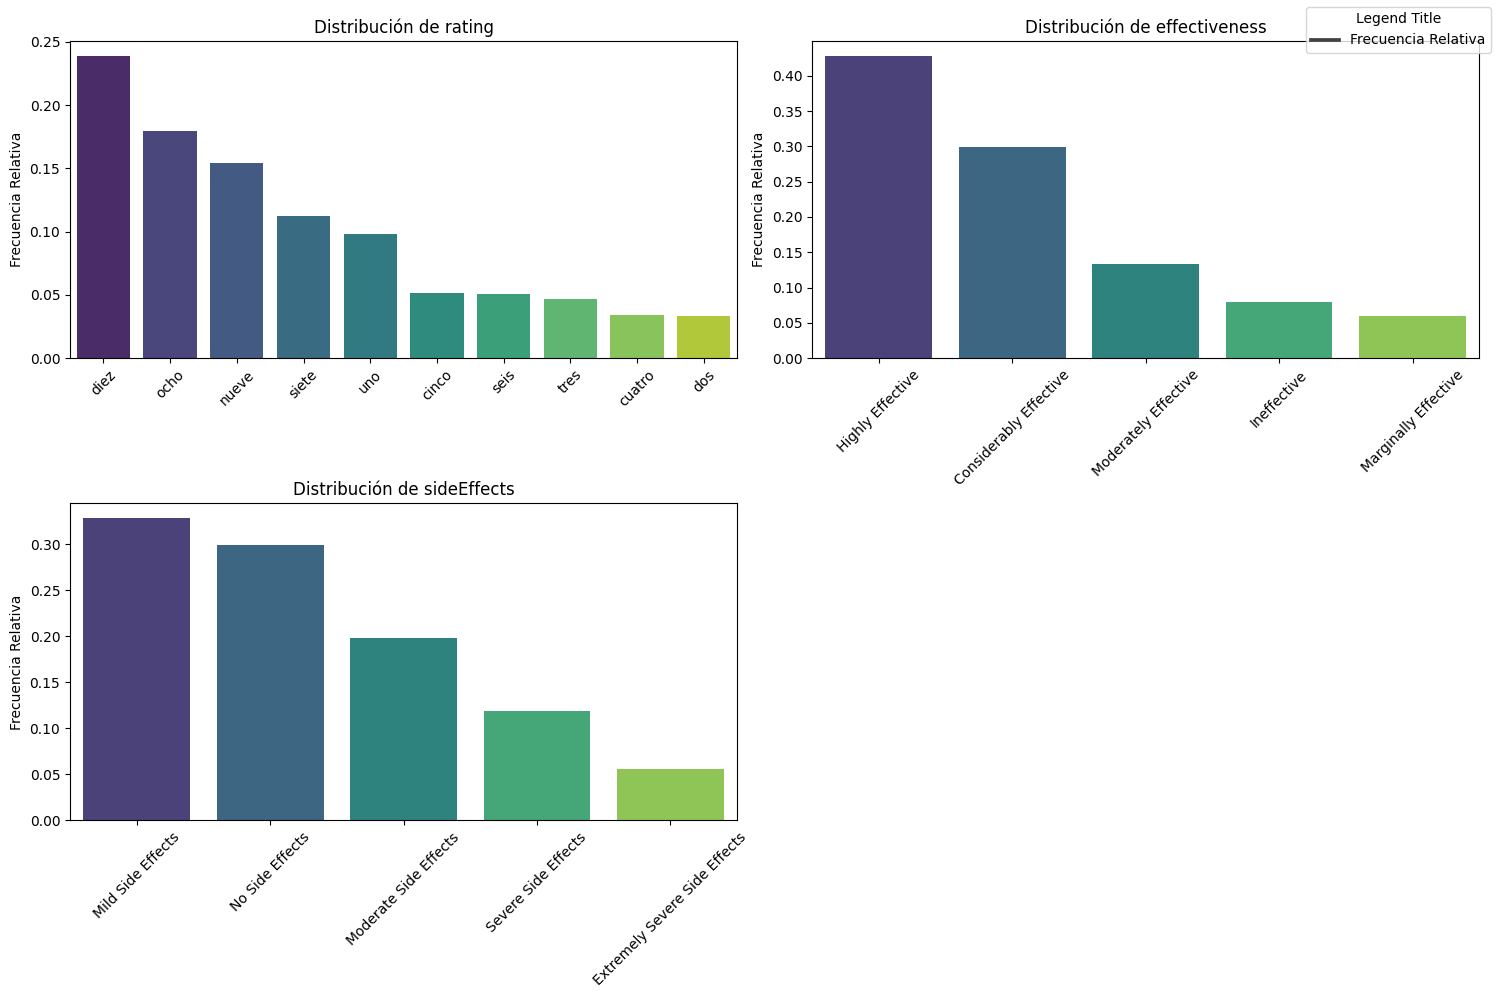

In [26]:
bt.pinta_distribucion_categoricas(df_med, columnas_categoricas=['rating', 'effectiveness', 'sideEffects'], relativa=True, mostrar_valores=False)

<Figure size 2000x2000 with 0 Axes>

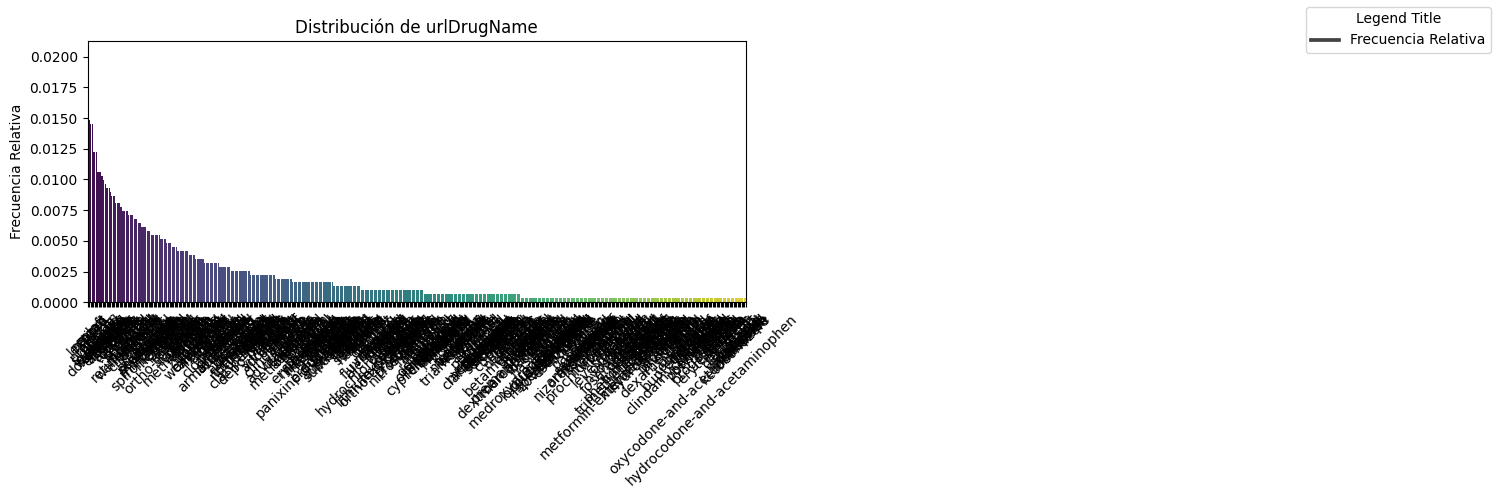

In [28]:

bt.pinta_distribucion_categoricas(df_med, columnas_categoricas=['urlDrugName'], relativa=True, mostrar_valores=False)

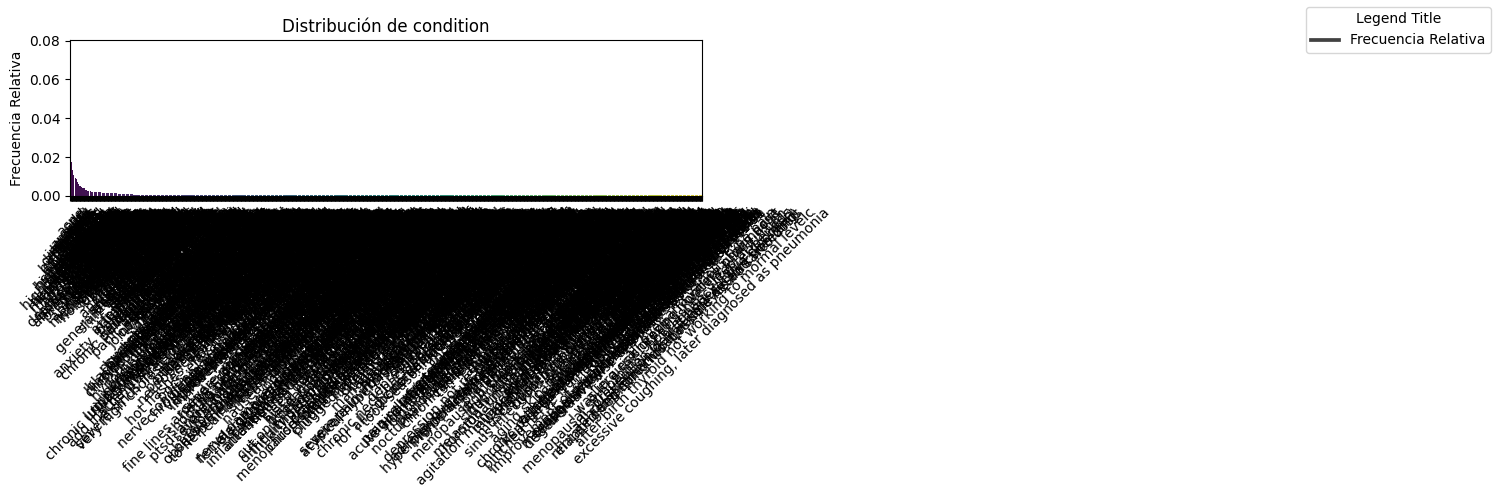

In [29]:
bt.pinta_distribucion_categoricas(df_med, columnas_categoricas=['condition'], relativa=True, mostrar_valores=False)

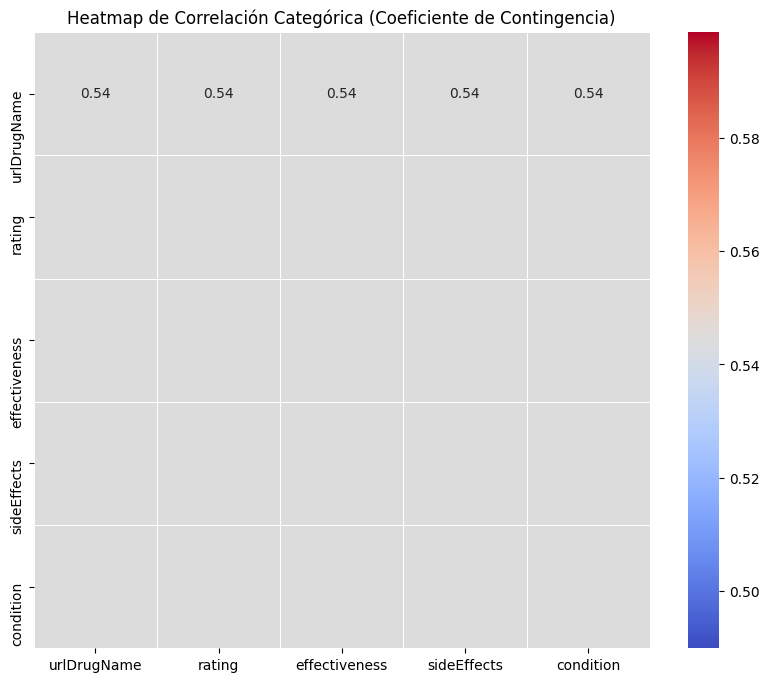

0.5442784237773481

In [30]:
bt.categorical_correlation_heatmap(df_med)

### Ejercicio 3

Construye un train set (llámalo X) sólo con las features que hayas seleccionado del ejercicio anterior (es decir las que no hayas descartado como posibles features) 

In [42]:
train_set_X, train_set_y=train_test_split(df_med,test_size=0.2, random_state=101)

print(train_set_X.shape)
print(train_set_y.shape)

(2485, 5)
(622, 5)


In [43]:
X=train_set_X.copy()
y=train_set_y.copy()

### Ejercicio 4 

Trasforma las features que consideres necesario (categóricas y numéricas) y luego aplica el escalado que consideres necesario.

In [44]:
df_med

,urlDrugName,rating,effectiveness,sideEffects,condition
0,enalapril,cuatro,Highly Effective,Mild Side Effects,management of congestive heart failure
1,ortho-tri-cyclen,uno,Highly Effective,Severe Side Effects,birth prevention
2,ponstel,diez,Highly Effective,No Side Effects,menstrual cramps
3,prilosec,tres,Marginally Effective,Mild Side Effects,acid reflux
4,lyrica,dos,Marginally Effective,Severe Side Effects,fibromyalgia
...,...,...,...,...,...
3102,vyvanse,diez,Highly Effective,Mild Side Effects,adhd
3103,zoloft,uno,Ineffective,Extremely Severe Side Effects,depression
3104,climara,dos,Marginally Effective,Moderate Side Effects,total hysterctomy
3105,trileptal,ocho,Considerably Effective,Mild Side Effects,epilepsy


In [45]:
columnas=['urlDrugName', 'rating', 'effectiveness', 'sideEffects', 'condition']

In [46]:
#aplico one hot enconding para escalarlas

df_med_scale=pd.get_dummies(df_med, columns=columnas)

In [47]:
df_med_scale

,urlDrugName_abilify,urlDrugName_accolate,urlDrugName_accupril,urlDrugName_accutane,urlDrugName_aciphex,urlDrugName_actiq,urlDrugName_actonel,urlDrugName_actos,urlDrugName_acyclovir,urlDrugName_aczone,...,condition_white spots on facial skin,condition_whiteheads,condition_wilson diseaes,condition_wrinkles,condition_wrinkles around eyes,"condition_wrinkles, furrows",condition_year round allergies,condition_yeast,condition_yeast diaper rash,condition_yeast infection
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3102,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3103,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3104,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3105,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [48]:
train_set_sca_X, test_set_sca_y=train_test_split(df_med_scale,test_size=0.2, random_state=101)

print(train_set_sca_X.shape)
print(test_set_sca_y.shape)

Xc=train_set_sca_X.copy()
yc=train_set_sca_X.copy()

(2485, 1948)
(622, 1948)


In [49]:
num_clusters=5

kmeans=KMeans(n_clusters=num_clusters, random_state= 101)

In [74]:
kmeans

KMeans(n_clusters=5, random_state=101)

In [64]:
# entreno con los centroides escalado
kmeans.fit(Xc)


KMeans(n_clusters=5, random_state=101)

In [65]:
# asigno los clusters a los datos
clusters=kmeans.predict(Xc)
clusters

array([2, 2, 2, ..., 0, 0, 4], dtype=int32)

In [78]:
len(clusters)

2485

In [66]:
# etiquetas de los clusters
labels= kmeans.labels_
labels


array([2, 2, 2, ..., 0, 0, 4], dtype=int32)

In [72]:
len(labels)

2485

In [67]:
#centroides
centroides=kmeans.cluster_centers_
centroides

array([[ 2.72479564e-03, -5.42101086e-19,  0.00000000e+00, ...,
         1.36239782e-03,  1.36239782e-03,  2.72479564e-03],
       [ 2.04918033e-03, -1.30104261e-18,  0.00000000e+00, ...,
        -1.30104261e-18, -1.30104261e-18,  2.04918033e-03],
       [ 1.85528757e-03, -1.62630326e-18,  0.00000000e+00, ...,
        -1.62630326e-18, -1.62630326e-18, -9.54097912e-18],
       [ 3.12500000e-03,  3.12500000e-03,  0.00000000e+00, ...,
         8.67361738e-19,  8.67361738e-19,  3.12500000e-03],
       [-8.67361738e-18, -4.33680869e-19,  0.00000000e+00, ...,
        -4.33680869e-19, -4.33680869e-19,  2.47524752e-03]])

In [68]:
kmeans.inertia_

8293.476071278248

### Ejercicio 5: Otención de K, aproximación visual

Analiza la relación entre features (con scatter plots) una vez transformadas para comprobar si existe visualmente algún indicio del número de clústeres que podríamos estar buscando. Por otro lado este análisis nos puede hacer descartar alguna feature o generar una nueva

In [77]:
plt.figure(figsize=(8, 4))
plot_clusters(X)
plt.gca().set_axisbelow(True)
plt.grid()
for centroide in blob_centroides:
    plt.scatter(x = centroide[0], y = centroide[1], marker = "x", c = "black")
plt.show()

IndexError: invalid index to scalar variable.

### Ejercicio 6: Obtención de K, método del codo

Evalua diferentes valores K y escoge uno a partir del método del codo/elbow de inercia.

In [79]:
bt.plot_elbow_method(df_med_scale, max_clusters=2485)

### Ejercicio 7: Obtención de K, Score de Silueta

Comprueba el ajuste de k obteniendo el k que maximiza el score de silueta y pinta un gráfico de la evolución de dicho score con k. Usa los valores de k que hayas probado en el ejercicio anterior.

In [ ]:
from sklearn.metric import si

### Ejercicio 8: Obtención de K, diagrama de silueta

Para completar el estudio de k, muestra el diagramde silueta para k=2,3,4,5 y decide con este datos y los anteriores el valor de k a probar. NOTA: En la realidad, podríamos probar perfectamente k=2 y k=3 y luego que "Negocio" decidiera cuál le es más útil, aquí lo completamos por practicar todo lo aprendido

### Ejercico 9:

En general, una diferencia entre el proceso de construcción de un modelo no supervisado y un supervisado es que el ajuste de algunos hiperparámetros (como el número de clústeres) es anterior a la construcción del modelo. Por eso, construye un K-means para el valor (o valores) de K escogidos.

### Ejercicio 10

Vamos a comprobar resultados, analizando los valores medios y distribución de cada uno de los clústeres para el k óptimo. Si tuvieras más de un posible valor de k a probar, analiza aquí el de mayor score de silueta. Y utiliza el siguiente ejercicio para el otro. Además de hacer un describe de las features por clúster, pinta estos con un pairplot considerando sideEffects y rating como x e y (o viceversa) y el clúster como hue (color). Compara el resultado con los clústeres sugeridos en el ejercicio 5.

### Ejercicio 11, EXTRA: Más valores de K

Repite el análisis del ejercicio 10 para un K diferente pero que consideres que tiene sentido aplicar.